<a href="https://colab.research.google.com/github/Harshh1206/Credit-Card-Fraud-Detection/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


In [ ]:
#Loading the dataset to pandas DataFrame
credit_card_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IBM_Credit_Card_Transactions.csv')
print(credit_card_data)

            Time        V1        V2        V3        V4        V5        V6  \
0            0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1            0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3            1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4            2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...          ...       ...       ...       ...       ...       ...       ...   
286786  157162.0  2.096399 -0.183731 -2.102955  0.379027  0.614825 -0.587995   
286787   75559.0  1.155272 -0.303954  1.029747  0.534172 -0.948034  0.083682   
286788   59896.0 -1.201709  0.115661  2.128686  1.493423  1.813246 -0.352878   
286789    2423.0  1.333728  0.232426 -1.708410 -0.070780  2.556949  3.062569   
286790  135138.0 -0.645824  0.130420 -0.546408 -0.891707  2.980859  3.715148   

              V7        V8        V9  .

In [ ]:
#first 5  rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
286786,157162.0,2.096399,-0.183731,-2.102955,0.379027,0.614825,-0.587995,0.360086,-0.221867,0.664633,...,-0.087439,-0.208589,0.021333,0.085483,0.259776,0.390344,-0.104902,-0.074067,26.96,0.0
286787,75559.0,1.155272,-0.303954,1.029747,0.534172,-0.948034,0.083682,-0.770950,0.241482,0.698154,...,0.122160,0.419268,-0.109251,0.041458,0.315098,0.577199,-0.005754,0.010693,20.00,0.0
286788,59896.0,-1.201709,0.115661,2.128686,1.493423,1.813246,-0.352878,0.211210,-0.004648,-1.029237,...,0.057185,0.006553,0.043043,-0.296108,-0.268663,-0.303852,-0.075377,-0.065763,0.77,0.0
286789,2423.0,1.333728,0.232426,-1.708410,-0.070780,2.556949,3.062569,-0.034007,0.647466,-0.400591,...,-0.051475,-0.243130,-0.179704,1.009990,1.009982,-0.280482,-0.005862,0.003838,0.89,0.0
286790,135138.0,-0.645824,0.130420,-0.546408,-0.891707,2.980859,3.715148,0.291074,0.823625,-2.315586,...,-0.201072,-0.323059,-0.303122,0.664223,0.953805,-0.193464,0.067596,0.062735,53.63,0.0


In [ ]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286791 entries, 0 to 286790
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    285968 non-null  float64
 1   V1      285963 non-null  float64
 2   V2      285982 non-null  float64
 3   V3      285988 non-null  float64
 4   V4      285969 non-null  float64
 5   V5      285933 non-null  float64
 6   V6      285990 non-null  float64
 7   V7      286014 non-null  float64
 8   V8      285975 non-null  float64
 9   V9      285949 non-null  float64
 10  V10     285993 non-null  float64
 11  V11     285937 non-null  float64
 12  V12     285998 non-null  float64
 13  V13     285951 non-null  float64
 14  V14     285984 non-null  float64
 15  V15     286020 non-null  float64
 16  V16     285950 non-null  float64
 17  V17     285976 non-null  float64
 18  V18     285979 non-null  float64
 19  V19     285953 non-null  float64
 20  V20     285977 non-null  float64
 21  V21     28

CHECK MISSING VALUES

In [ ]:
# checking the number of missing values in each column
print(credit_card_data.isnull().sum())

Time      823
V1        828
V2        809
V3        803
V4        822
V5        858
V6        801
V7        777
V8        816
V9        842
V10       798
V11       854
V12       793
V13       840
V14       807
V15       771
V16       841
V17       815
V18       812
V19       838
V20       814
V21       823
V22       809
V23       788
V24       836
V25       821
V26       822
V27       825
V28       777
Amount    854
Class     803
dtype: int64


CLEANING DATA

1) CHECKING % MISSING VALUES

In [ ]:
missing_percentage = (credit_card_data.isnull().sum() / len(credit_card_data)) * 100
print(missing_percentage)


Time      0.286969
V1        0.288712
V2        0.282087
V3        0.279995
V4        0.286620
V5        0.299173
V6        0.279297
V7        0.270929
V8        0.284528
V9        0.293594
V10       0.278251
V11       0.297778
V12       0.276508
V13       0.292896
V14       0.281390
V15       0.268837
V16       0.293245
V17       0.284179
V18       0.283133
V19       0.292199
V20       0.283830
V21       0.286969
V22       0.282087
V23       0.274765
V24       0.291501
V25       0.286271
V26       0.286620
V27       0.287666
V28       0.270929
Amount    0.297778
Class     0.279995
dtype: float64


2) Cleaning Missing Values by using KNNImputer


In [ ]:
data = credit_card_data.dropna(subset=['Class'])

In [ ]:
from sklearn.impute import KNNImputer

#KNN Imputation
imputer = KNNImputer(n_neighbors=5)
credit_card_data.iloc[:, :] = imputer.fit_transform(credit_card_data.iloc[:, :])

# check for missing values after imputation
print(credit_card_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


3) Check Duplicates


In [ ]:
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 2566


In [ ]:

data = data.drop_duplicates()

# After cleaning
print("Shape after removing duplicates:", data.shape)
print("Number of duplicate rows left:", data.duplicated().sum())


Shape after removing duplicates: (283422, 31)
Number of duplicate rows left: 0


ANALYSING THE DATA


In [ ]:

print(data['Class'].value_counts())

Class
0.0    282946
1.0       476
Name: count, dtype: int64


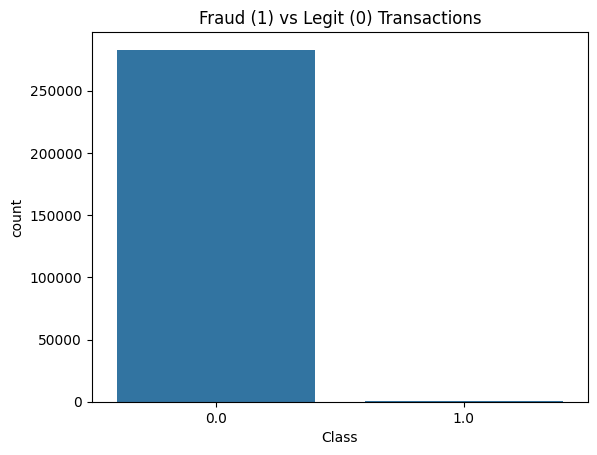

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=data)
plt.title("Fraud (1) vs Legit (0) Transactions")
plt.show()


DATA IS UNBALANCED HIGHLY
0---> Normal Transaction
1---> Fraud Transactions

USING SMOTE TO BALANCE OUT THE DATA


In [ ]:
x = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']

print ("before SMOTE :", Counter(y))

before SMOTE : Counter({0.0: 285495, 1.0: 493, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, n

In [ ]:
# Drop rows with missing 'Class' values from the original DataFrame
credit_card_data_cleaned = credit_card_data.dropna(subset=['Class'])

# Separate features (x) and target (y) from the cleaned DataFrame
x = credit_card_data_cleaned.drop('Class', axis=1)
y = credit_card_data_cleaned['Class']

# Impute missing values in x using SimpleImputer
imputer = SimpleImputer(strategy='median')
x_imputed = imputer.fit_transform(x)

smote = SMOTE(sampling_strategy=0.4 , random_state=42 )
x_resampled, y_resampled = smote.fit_resample(x_imputed, y)
print ("after SMOTE :", Counter(y_resampled))

after SMOTE : Counter({0.0: 285495, 1.0: 114198})


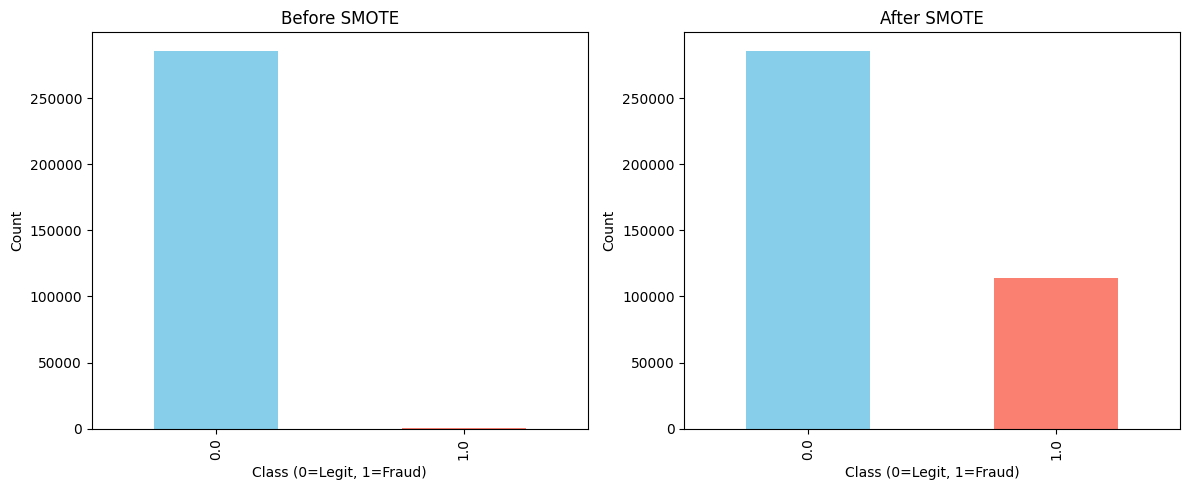

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Before SMOTE
y.value_counts().plot(kind='bar', ax=axes[0], color=['skyblue','salmon'])
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Class (0=Legit, 1=Fraud)")
axes[0].set_ylabel("Count")

# After SMOTE
pd.Series(y_resampled).value_counts().plot(kind='bar', ax=axes[1], color=['skyblue','salmon'])
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Class (0=Legit, 1=Fraud)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

Balanced out the dataset so that the trained model wont bais towards the majority class that is LEGIT transaction , this would cause the model to be inaccurate

SMOTE would balance out the dataset but the dataset is balanced  in a way to have 10% of the legit data so that the model wont be sensitive to all the transaction


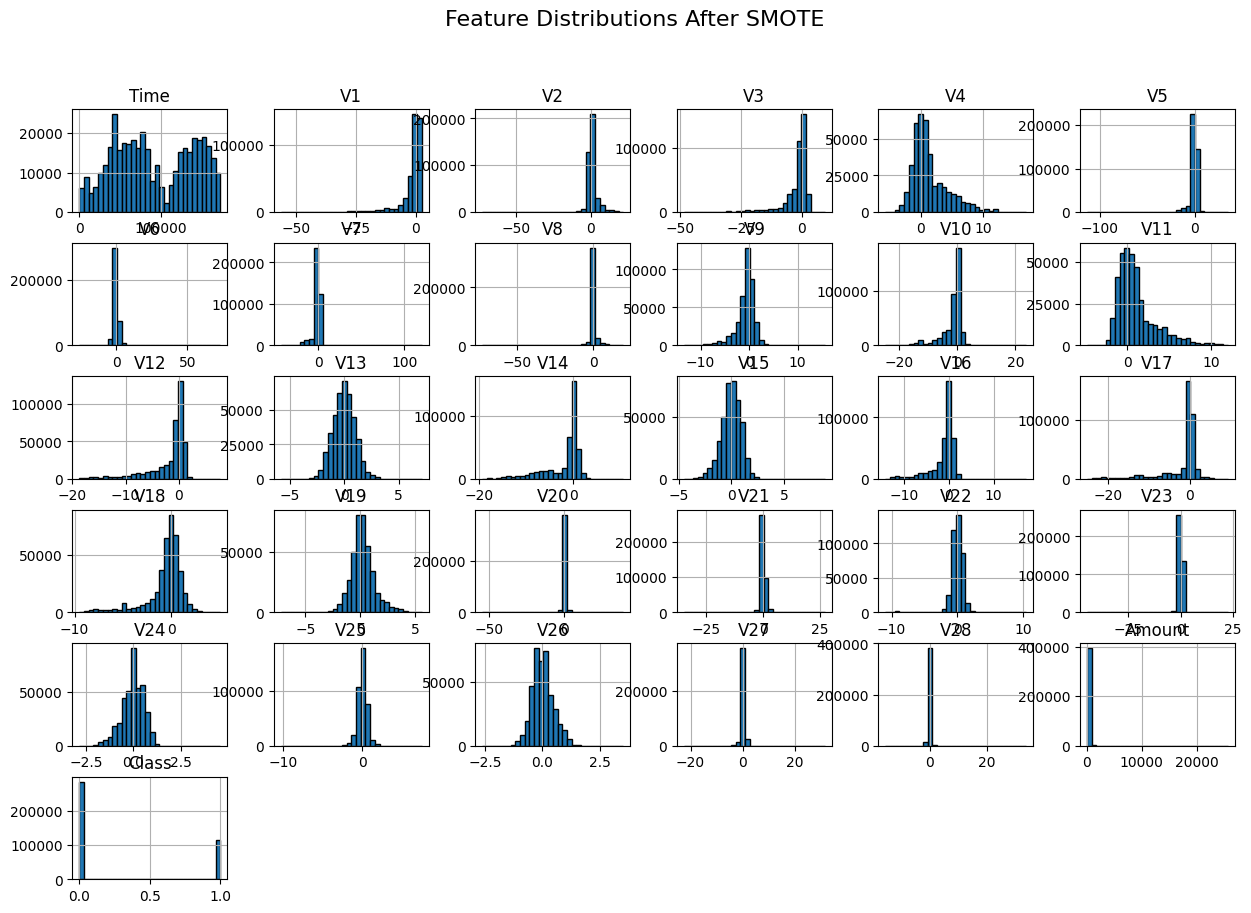

In [ ]:
# Convert the resampled data back to a pandas DataFrame
smote_pd = pd.DataFrame(x_resampled, columns=x.columns)
smote_pd['Class'] = y_resampled

smote_pd.hist(bins=30, figsize=(15,10), edgecolor='black')
plt.suptitle("Feature Distributions After SMOTE", fontsize=16)
plt.show()

Amount is heavily right-skewed, showing that most transactions are small, with a few very large transactions.



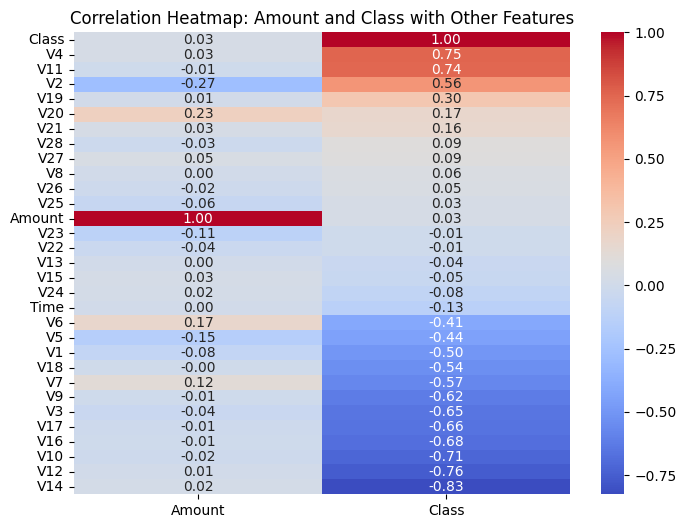

In [ ]:
correlation_matrix = smote_pd.corr()

# Focus on correlations with 'Amount' and 'Class'
correlation_with_amount_and_class = correlation_matrix[['Amount', 'Class']].sort_values(by='Class', ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_amount_and_class, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Amount and Class with Other Features")
plt.show()

Class (fraud vs non-fraud) is positively correlated with:

V4 (0.75)

V11 (0.74)

V2 (0.56)
These features might carry important signals for fraud detection

So, features V4, V11, V2, V14, V12, V10, V16, V17 are much stronger predictors of fraud compared to Amount

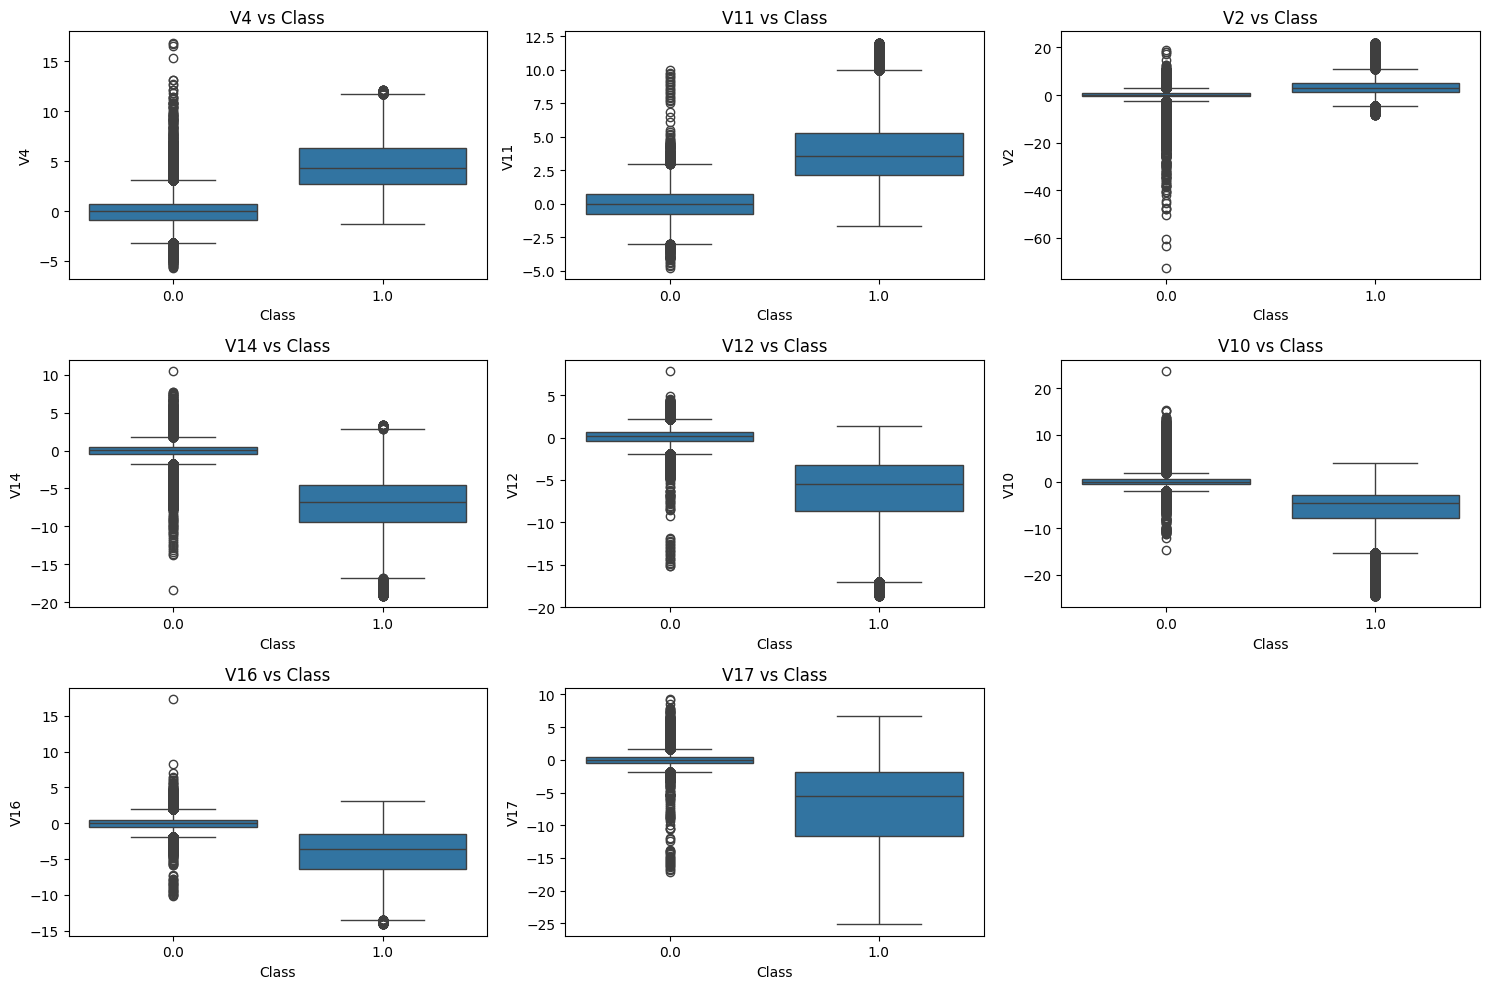

In [ ]:
# Features identified as highly correlated with 'Class'
features_to_plot = ['V4', 'V11', 'V2', 'V14', 'V12', 'V10', 'V16', 'V17']

# Create box plots for each feature against 'Class'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Class', y=feature, data=smote_pd)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()

V4, V11, V2 → Fraud tends to be higher.

V14, V12, V10 → Fraud tends to be lower (more negative).

V16, V17 → Fraud tends to be low
.

In [ ]:
# Saving the balanced dataset to a new CSV file
smote_pd.to_csv('balanced_credit_card_transactions.csv', index=False)

print("Balanced dataset saved to 'balanced_credit_card_transactions.csv'")

Balanced dataset saved to 'balanced_credit_card_transactions.csv'


Splitting data into Training data and Testing data


In [ ]:
from sklearn.model_selection import train_test_split

# Split the balanced dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=2, stratify=y_resampled)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (319754, 30)
Shape of x_test: (79939, 30)
Shape of y_train: (319754,)
Shape of y_test: (79939,)


MODEL TRAINING (Logistic Regression Model)


In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# training the model
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Model evaluation


In [ ]:
# Evaluating the model on the training data
y_train_pred = model.predict(x_train_scaled)
training_data_accuracy = accuracy_score(y_train_pred, y_train)
print('Accuracy on Training data:', training_data_accuracy)

# Evaluating the model on the test data
y_test_pred = model.predict(x_test_scaled)
test_data_accuracy = accuracy_score(y_test_pred, y_test)
print('Accuracy on Test data:', test_data_accuracy)

Accuracy on Training data: 0.9840877674712435
Accuracy on Test data: 0.9841754337682483


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import numpy as np

# Define the prediction function that Gradio will use
def predict_fraud(V4, V11, V2, Amount):

    # Create a list of input values in the correct order
    user_input = [V4, V11, V2, Amount]

    # Reshape the input data to be a 2D array
    input_array = np.asarray(user_input).reshape(1, -1)

    # Scale the input data using the pre-fitted scaler
    # The scaler was fitted on the full dataset, so we need to create a dummy input with all features
    # and fill in the relevant values before scaling.
    dummy_input = np.zeros((1, len(scaler.mean_)))
    feature_names = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount']
    input_features = ['V4', 'V11', 'V2', 'Amount']
    for i, feature in enumerate(input_features):
        dummy_input[0, feature_names.index(feature)] = user_input[i]


    scaled_input = scaler.transform(dummy_input)

    # Predict the class using the trained model
    prediction = model.predict(scaled_input)

    if prediction[0] == 0:
        return "Legitimate Transaction"
    else:
        return "Fraudulent Transaction"

# Create a list of Gradio input components based on the feature labels
feature_inputs = [gr.Number(label=label) for label in ['V4', 'V11', 'V2', 'Amount']]

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_fraud,
    inputs=feature_inputs,
    outputs="text",
    title="Credit Card Fraud Detection (Selected Features)",
    description="Enter the transaction details for V4, V11, V2, and Amount to predict if it's legitimate or fraudulent."
)

# Launch the interface
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ef5cc4e9dec81b99b3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
